# Homework Assignment 

# 1: Data Preprocessing and Evaluation

CSCI-P 556:  APPLIED MACHINE LEARNING
Spring 2021

## Required Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## Loading And Analysing Data 

### Q: Create a Python function to load the data from your local directory.  Display the top few rows of the data.
- load_housing_data() is a python function which takes in path of local directory to load data.
- head() method is used to display top few rows of the dataframe.

In [2]:
def load_housing_data(path):
    return pd.read_csv(path)

In [3]:
local_path = "/Users/prateesh/Desktop/Applied ML/hw1/housing_data.csv"
housing = load_housing_data(local_path)
housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### Q: How many data samples are present in the dataset?  What attributes/features are continuous valued?  Which attributes are categorical?

info( ) to get information about the data, including formats of attributes/labels and We can either plot histogram to check formats of attributes or use value_counts( ) which checks for individual attribute

* We have 4600 samples of housing data with 18 attributes
* Categorical Attributes : Bedrooms, Bathrooms, floors, Waterfront, View, Condition
* Continoues Valued Attributes : Price, Sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, yr_renovated    

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

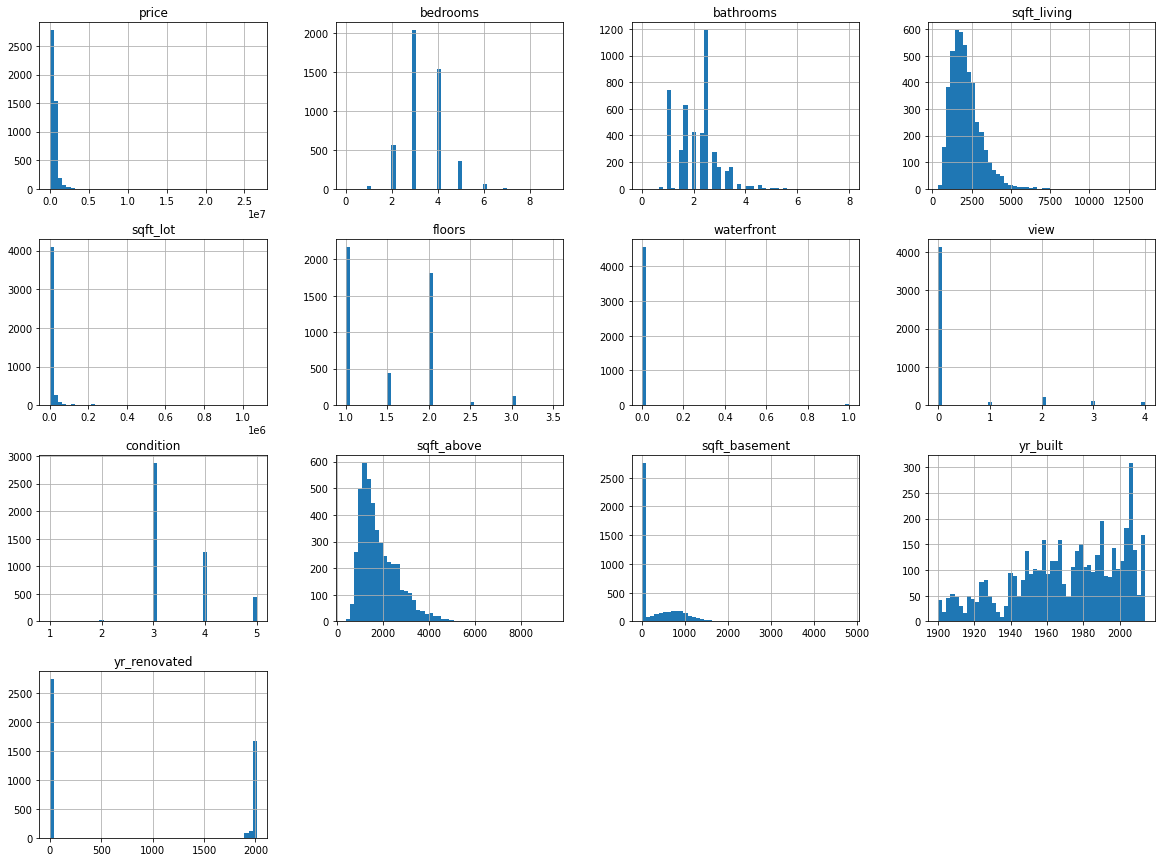

In [5]:
# Plotting Histograms to see charecteristics of the attributes
%matplotlib inline 
housing.hist(bins=50, figsize=(20,15)) 
plt.show()

Using the value counts fnction we can see if the attriubute is categorical or continuous

Ex:bedrooms is categorical,country is also categorical since there is only limited ways to categorize them. whereas sqft_living,sqft_lot are examples of continuous since they cannot be categorized.

In [6]:
housing["view"].value_counts()

0    4140
2     205
3     116
4      70
1      69
Name: view, dtype: int64

In [7]:
housing["bedrooms"].value_counts()

3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
0.0       2
8.0       2
9.0       1
Name: bedrooms, dtype: int64

In [8]:
housing["sqft_basement"].value_counts()

0       2745
500       53
600       45
800       43
900       41
        ... 
70         1
4820       1
862        1
894        1
875        1
Name: sqft_basement, Length: 207, dtype: int64

#### If you check value_counts( ) for a continoues attribute like sqft_basement you get lengthy output like this.

### Q: Remove the date, street and country attributes.
Use drop from pandas library to drop attributes

In [9]:
# axis =1 deletes Column instead of rows
# inplace = true makes dropping in housing instead of creating a new dataframe object
housing.drop(['date', 'street','country'], axis=1, inplace = True)

In [10]:
# You can check that they are 3 less attributes now
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   object 
 14  statezip       4600 non-null   object 
dtypes: float64(4), int64(9), object(2)
memory usage: 539.2+ KB


### Q : Display the statistical values for each of the attributes, along with visualizations of the distributions  for  each  attribute.  


### Explain  noticeable  traits  for  key  attributes.   Are  there  any attributes  that  might  require  special  treatment?   If  so,  what  special  treatment  might  they require?


In [11]:
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


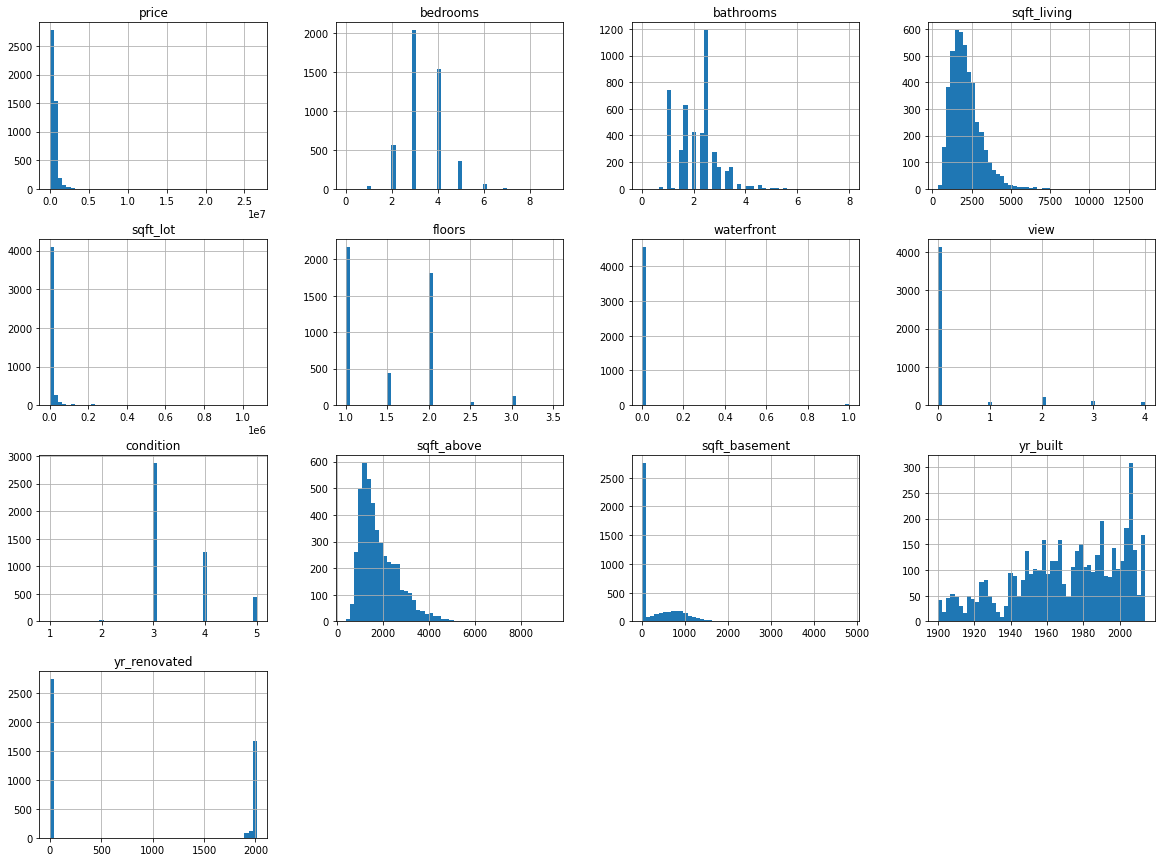

In [12]:
# Plotting Histograms to see charecteristics of the attributes
%matplotlib inline 
housing.hist(bins=50, figsize=(20,15)) 
plt.show()

### Q : Notice that some of the instances have a value of zero for the house price, Write two functions

 1. To compute the mean house price from the non-zero instances.  
 2. To compute the median house price for the non-zero instances.

There are a total of 49 instances of 0 values in prices we can replace this with either mean or median

In [13]:
(housing['price']==0).sum()

49

In [14]:
def find_mean(attr):
# Finding mean for non-zero rows 
    total , count = 0,0
    for row in attr:
        if row != 0:
            total = total + row
            count = count + 1
    return total/count

In [15]:
def find_median(attr):
# Appending non-zero rows to nz_attr 
    count = 0
    nz_attr = []
    for row in attr:
        if row != 0:
            nz_attr.append(row)
            
# Sorting nz_attr to find median             
    nz_attr = np.sort(nz_attr)
    length = len(nz_attr)

    if length % 2 == 0:
        mid1 = nz_attr[length//2]
        mid2 = nz_attr[length//2 - 1]
        return (mid1 + mid2)/2
    else:
        return nz_attr[length//2]
    

In [16]:
print('Values From Defined Methods \n')
print("Mean of Non-zero House Price's is: {}".format((find_mean(housing['price']))))
print("Median of Non-zero House Price's is: {}".format(find_median(housing['price'])))                                       

Values From Defined Methods 

Mean of Non-zero House Price's is: 557905.8991379443
Median of Non-zero House Price's is: 465000.0


### Note: that you should not use the built-in median and mean functions to do this, but should compute it yourself. You can, however compare the result of your functions to the built-in functions to verify your implementation

In [17]:
# Mask returns values which return false for the eq(0) condition i.e.. Non-zero instances 
print("Built-in Mean : {}".format(housing['price'].mask(housing['price'].eq(0)).mean()))
print("Built-in Median : {}".format(housing['price'].mask(housing['price'].eq(0)).median()))

Built-in Mean : 557905.8991379443
Built-in Median : 465000.0


### Q: Create three instances of the dataset :  

1. Remove all instances of houses with prices of zero

2. Replace the zero-priced houses with the median price value from the non-zeropriced houses, using your median function from above  

3. Replace the zero-priced houses with the mean price value from the non-zero priced houses,  using your mean valuefunction above.  



In [18]:
# housing_1 = Remove all instances of houses with prices of zero
housing_1 = housing.copy()
price_column = housing_1['price']
nz_indexes = []

for i in range(len(price_column)):
    if price_column[i] == 0:
        nz_indexes.append(i)
        
housing_1 = housing_1.drop(housing_1.index[nz_indexes])

In [19]:
# Let's check no of zeros in housing_1 
(housing_1['price']==0).sum()

0

In [20]:
# housing_2 = Replace all zero instances with median of non-zero instances
housing_2 = housing.copy()
median_h2 = find_median(housing_2['price'])
housing_2.price = housing_2.mask(housing_2['price']==0).fillna(median_h2)

In [21]:
# Let's check by finding median of housing_2
# It should be equal to non-zero median of housing 
find_median(housing) == find_median(housing_2)

True

In [22]:
# Recheck for zero instances
(housing_2['price']==0).sum()

0

In [23]:
# housing_3 = Replace all zero instances with mean of non-zero instances
housing_3 = housing.copy()
mean_h3 = find_mean(housing_3['price'])
housing_3.price = housing_3.mask(housing_3['price']==0).fillna(mean_h3)

In [24]:
# We can't check with mean/median in this case
# Let's Check with zero instances again
(housing_3['price']==0).sum()

0

###  Generate histogram plots of the house prices for all the four cases housing, housing_1, housing_2, housing_3 

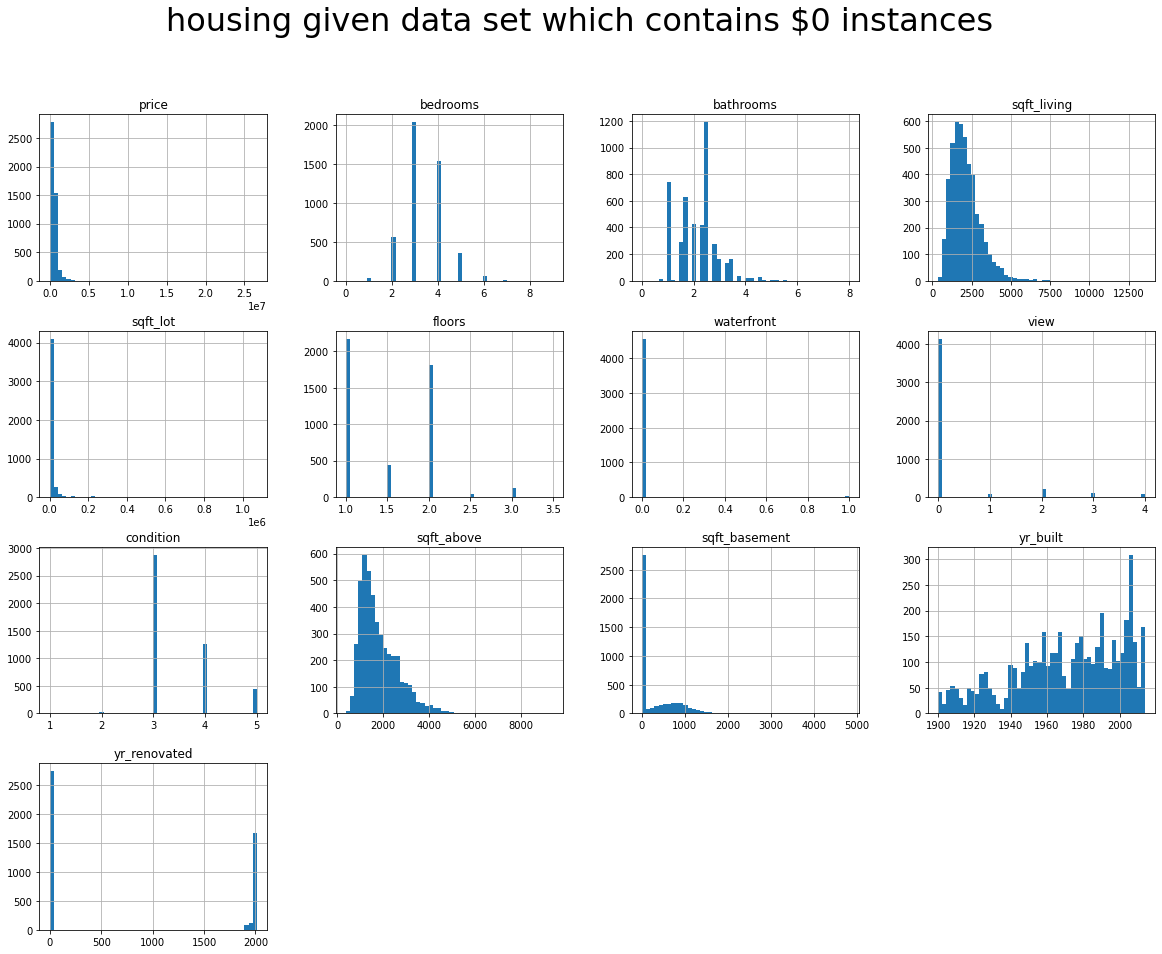

In [25]:
# housing given data set which contains $0 instances 
%matplotlib inline 
housing.hist(bins=50, figsize=(20,15)) 
plt.suptitle('housing given data set which contains $0 instances', size=32)
plt.show()

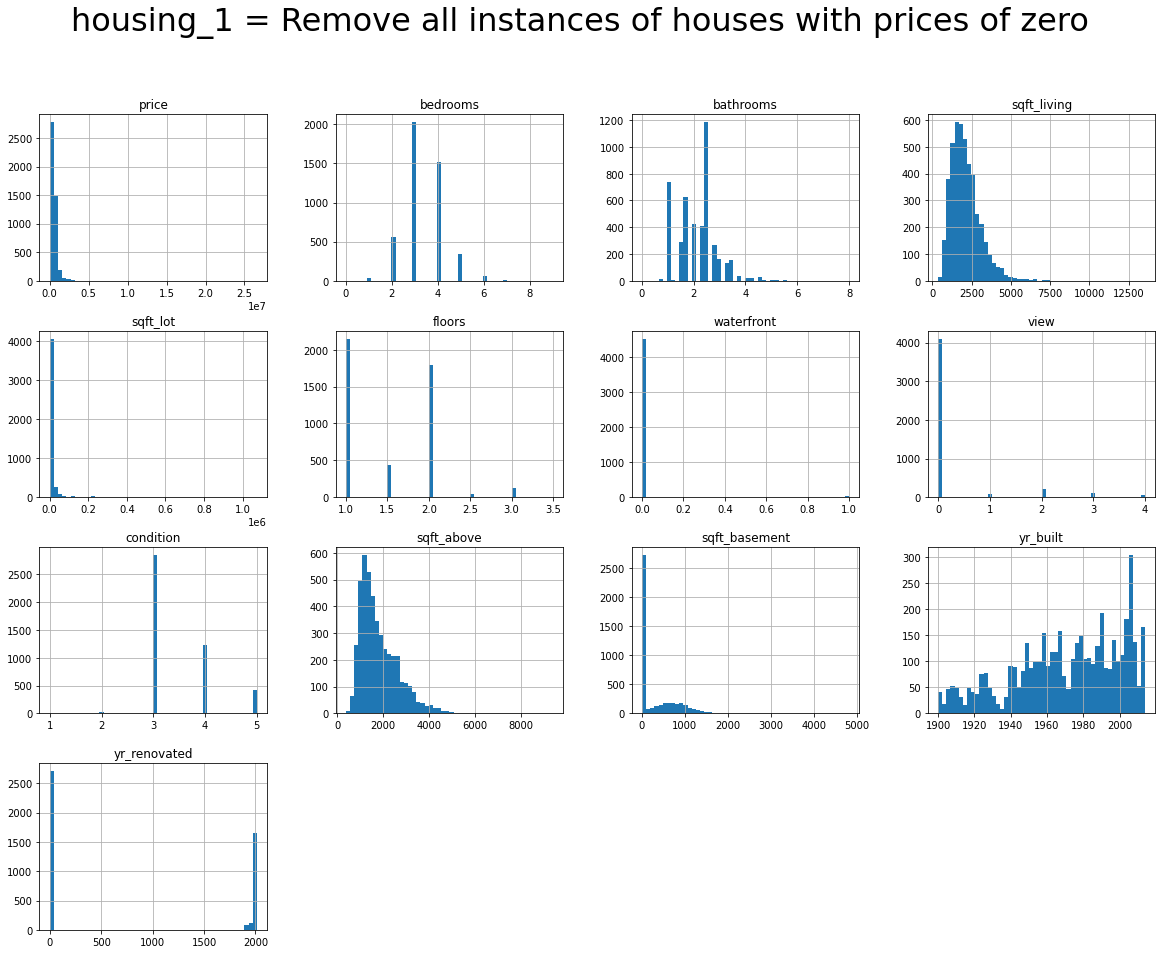

In [26]:
# housing_1 = Remove all instances of houses with prices of zero
%matplotlib inline 
housing_1.hist(bins=50, figsize=(20,15))
plt.suptitle('housing_1 = Remove all instances of houses with prices of zero', size=32)
plt.show()

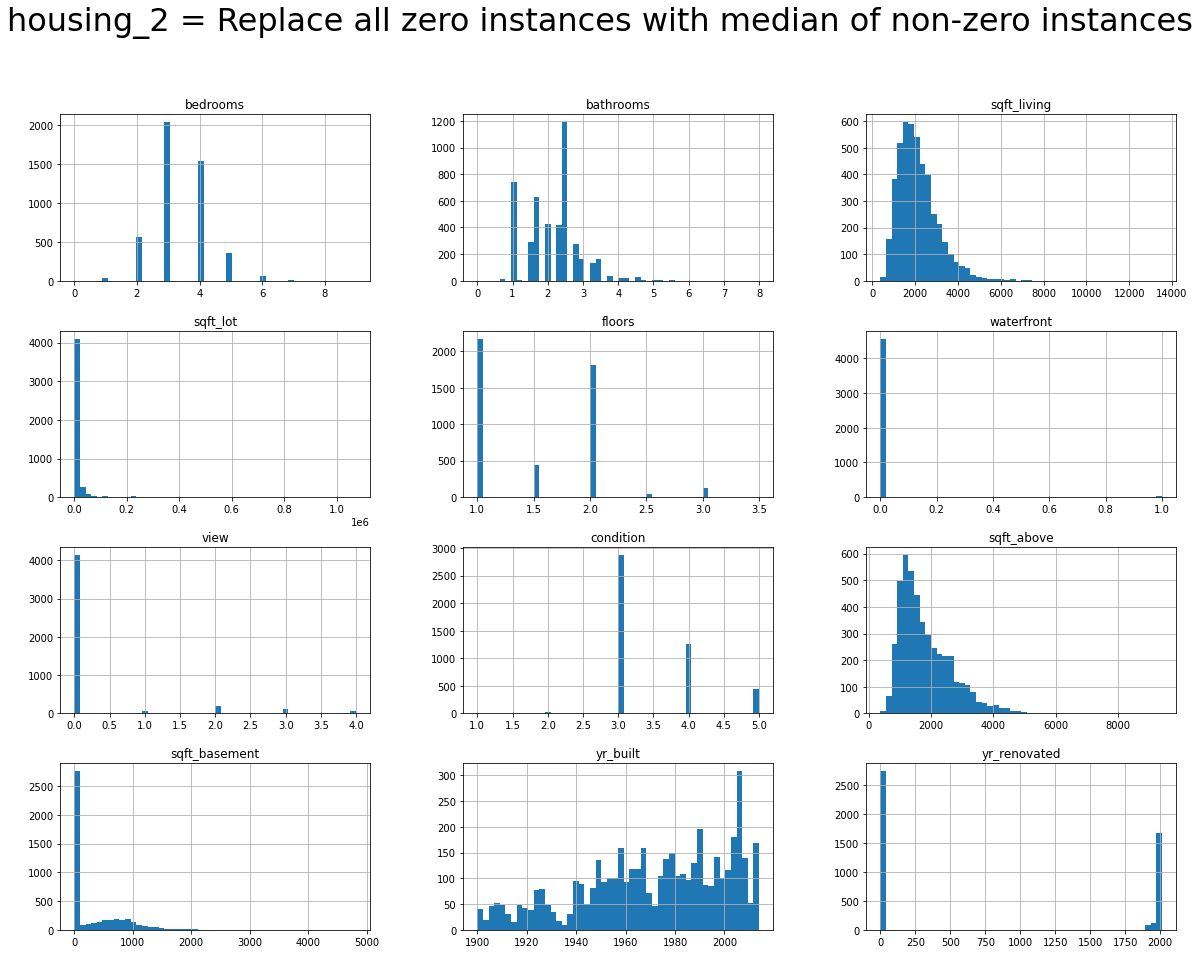

In [27]:
# housing_2 = Replace all zero instances with median of non-zero instances
%matplotlib inline 
housing_2.hist(bins=50, figsize=(20,15)) 
plt.suptitle('housing_2 = Replace all zero instances with median of non-zero instances', size=32)
plt.show()

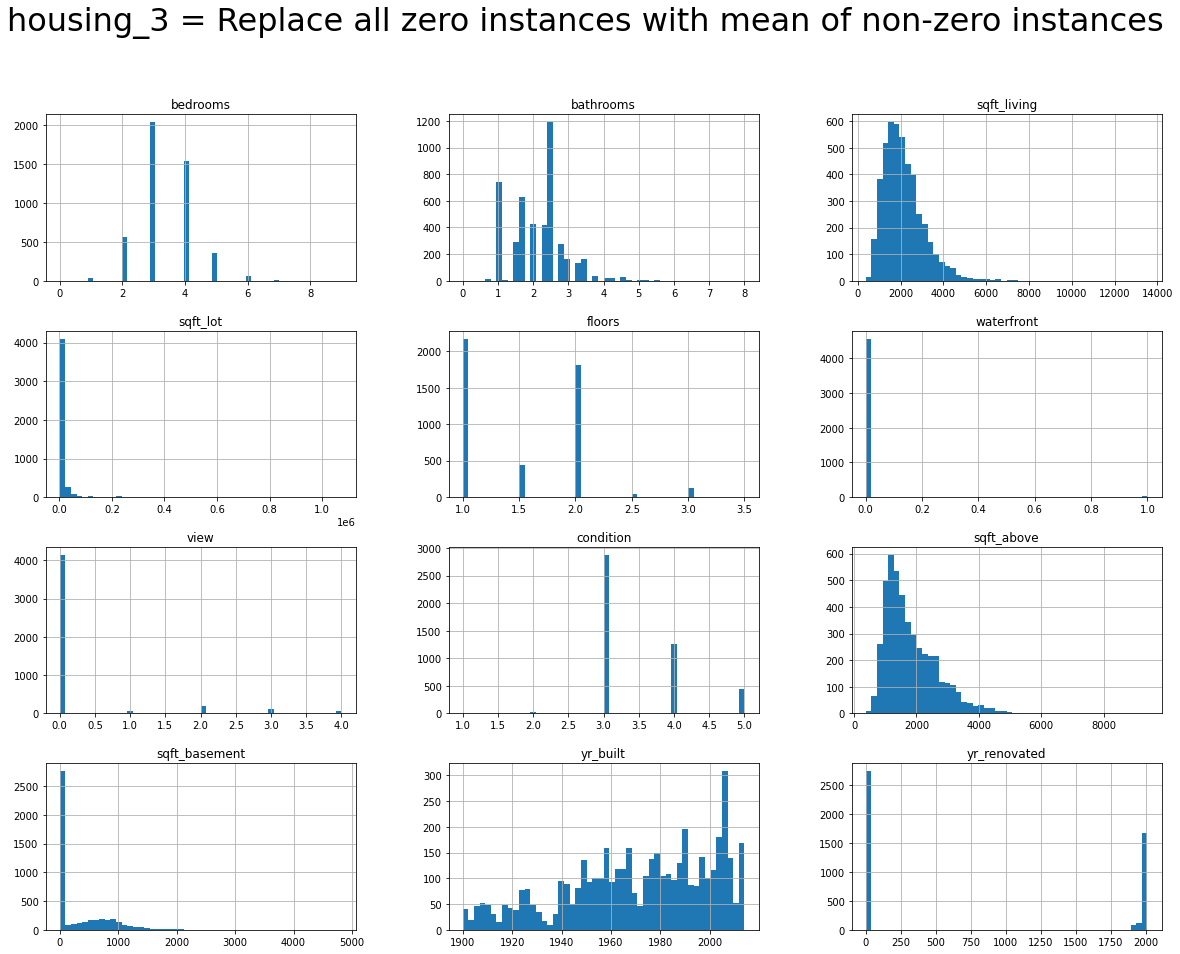

In [28]:
# housing_3 = Replace all zero instances with mean of non-zero instances
%matplotlib inline 
housing_3.hist(bins=50, figsize=(20,15)) 
plt.suptitle('housing_3 = Replace all zero instances with mean of non-zero instances', size=32)
plt.show()

### Q: For each of the above instances, visualize the dependency of the target on each continuous-valued feature (e.g.  2D scatter plot).  

Price is the target needed to be plot against sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, yr_renovated which are continous features

### What features seem to be linearly correlated with the target?  What features do not have a correlation with the target?

City and Statezip are the attributes whihc are not easily recognizable and categorized by the machine so it is better to one hot encode with these attributes.

The other attributes can be easily grouped,judged by the machine as they have numerical data which is continuous

In [29]:
def plotGraphs(x):
    fig, axs = plt.subplots(4)
    fig.set_size_inches(30, 20)
    axs[0].plot(x['sqft_living'], x['price'], 'o')
    axs[0].set_title('Sqft_living vs Price')
    axs[0].set_xlabel('sqft_living')
    axs[0].set_ylabel('price')
    axs[1].plot(x['sqft_lot'], x['price'], 'o', color = 'red')
    axs[1].set_title('Sqft_lot vs Price')
    axs[1].set_xlabel('sqft_lot')
    axs[1].set_ylabel('price')
    axs[2].plot(x['sqft_above'], x['price'], 'o', color = 'green')
    axs[2].set_title('Sqft_above vs Price')
    axs[2].set_xlabel('sqft_above')
    axs[2].set_ylabel('price')
    axs[3].plot(x['sqft_basement'], x['price'], 'o', color = 'orange')
    axs[3].set_title('Sqft_basement vs Price')
    axs[3].set_xlabel('sqft_basement')
    axs[3].set_ylabel('price')
    fig.tight_layout()
    

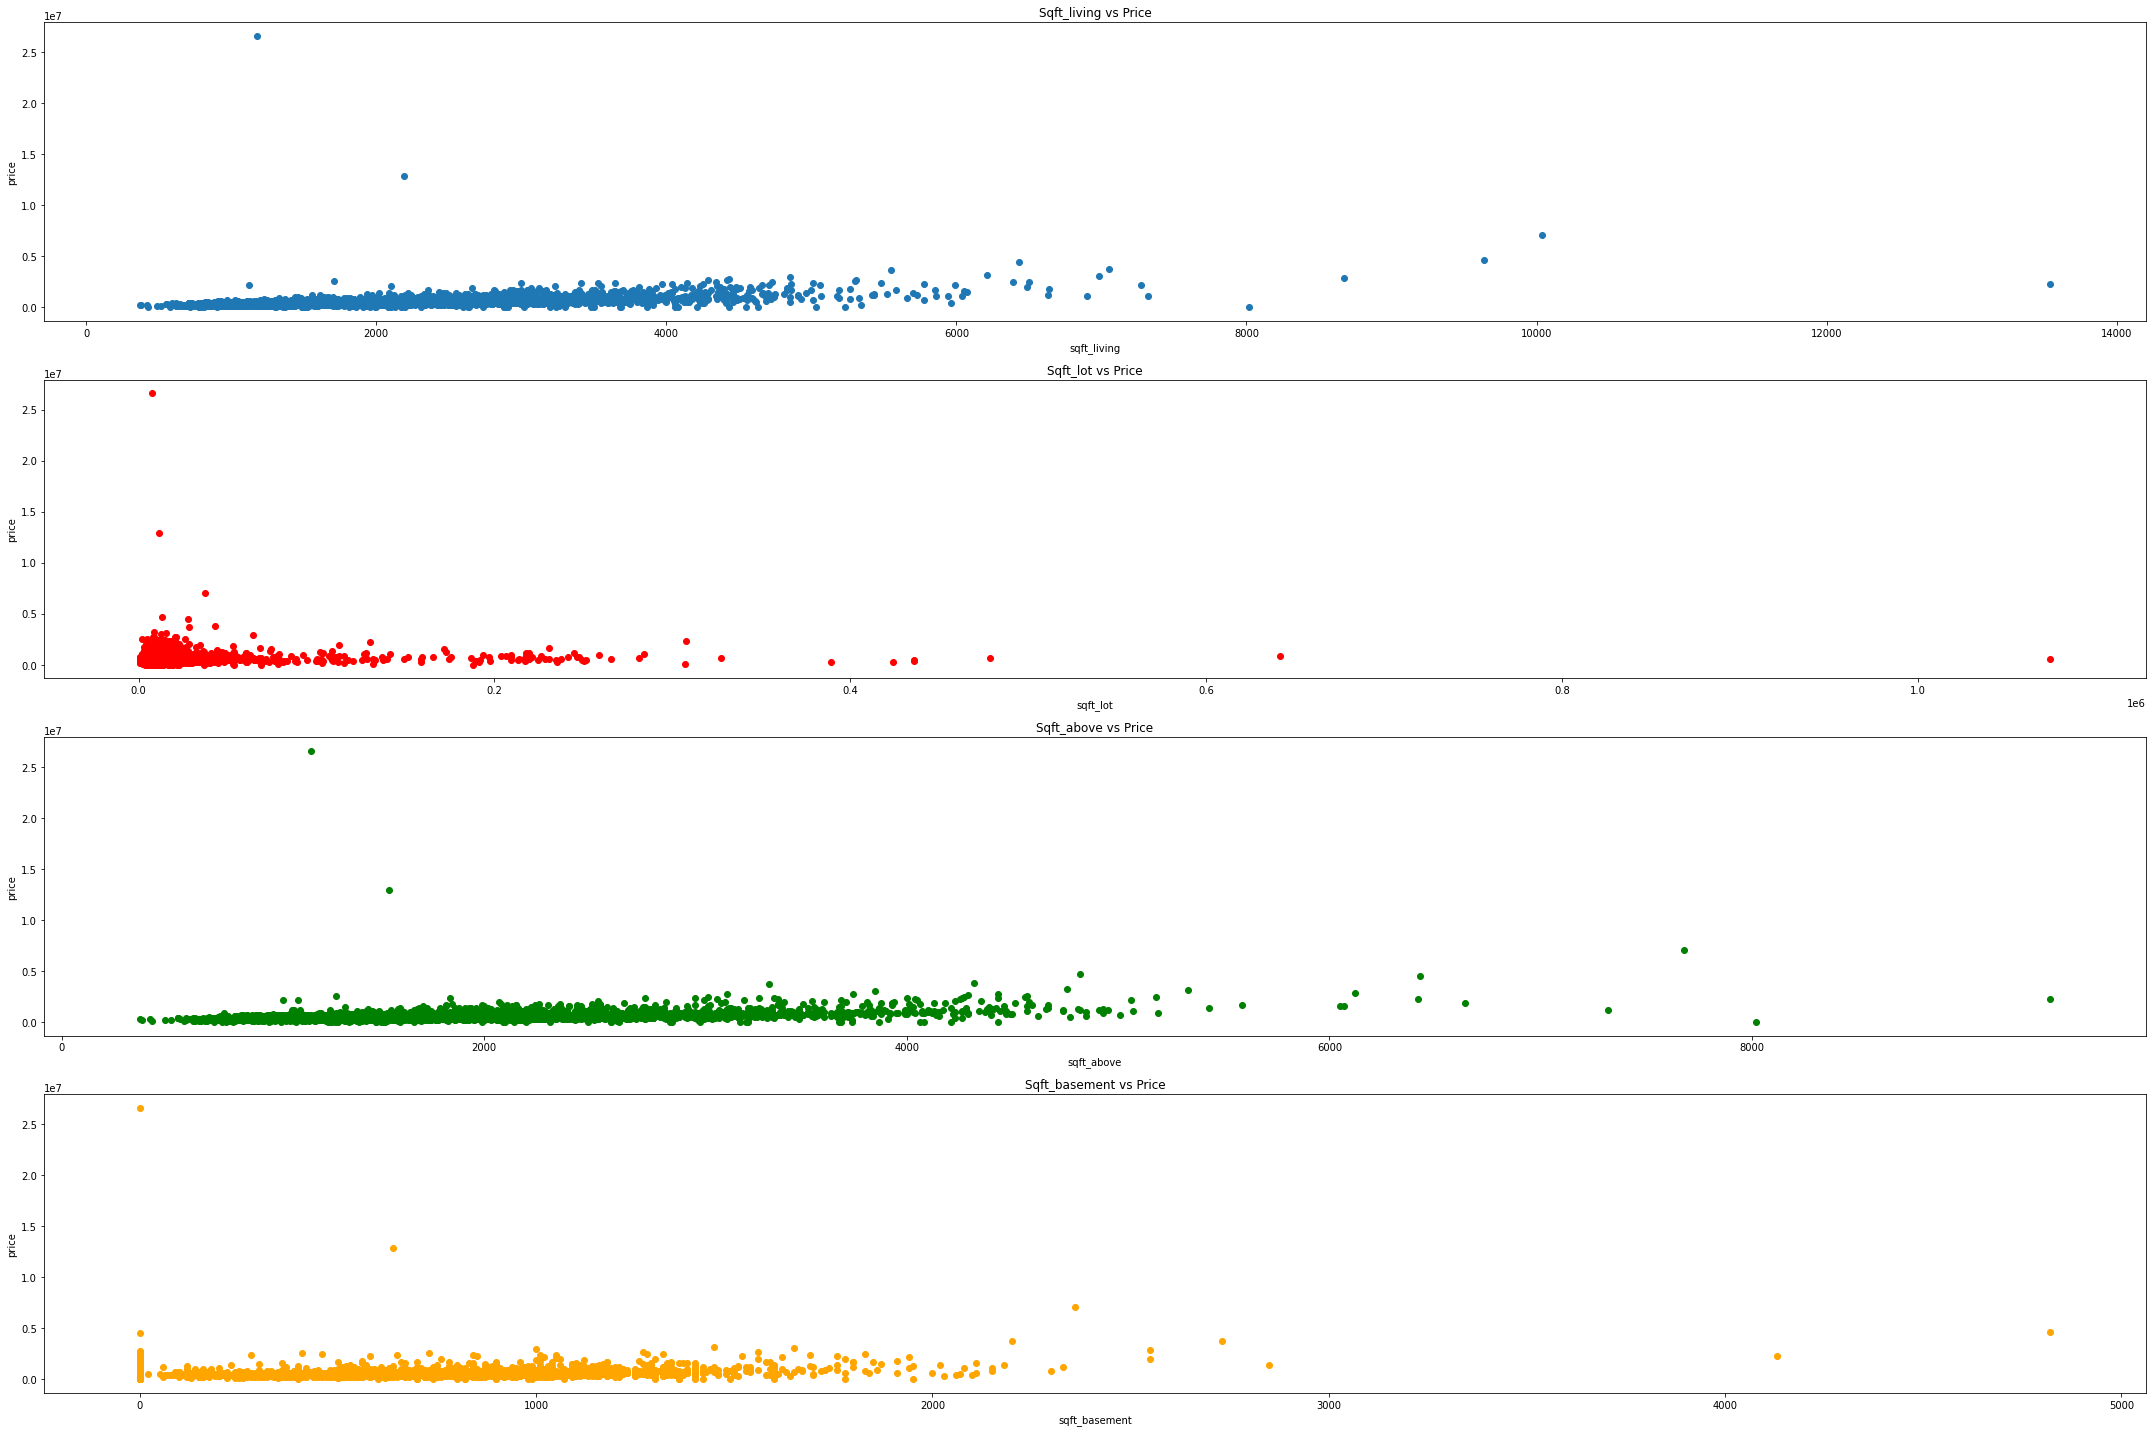

In [30]:
plotGraphs(housing)

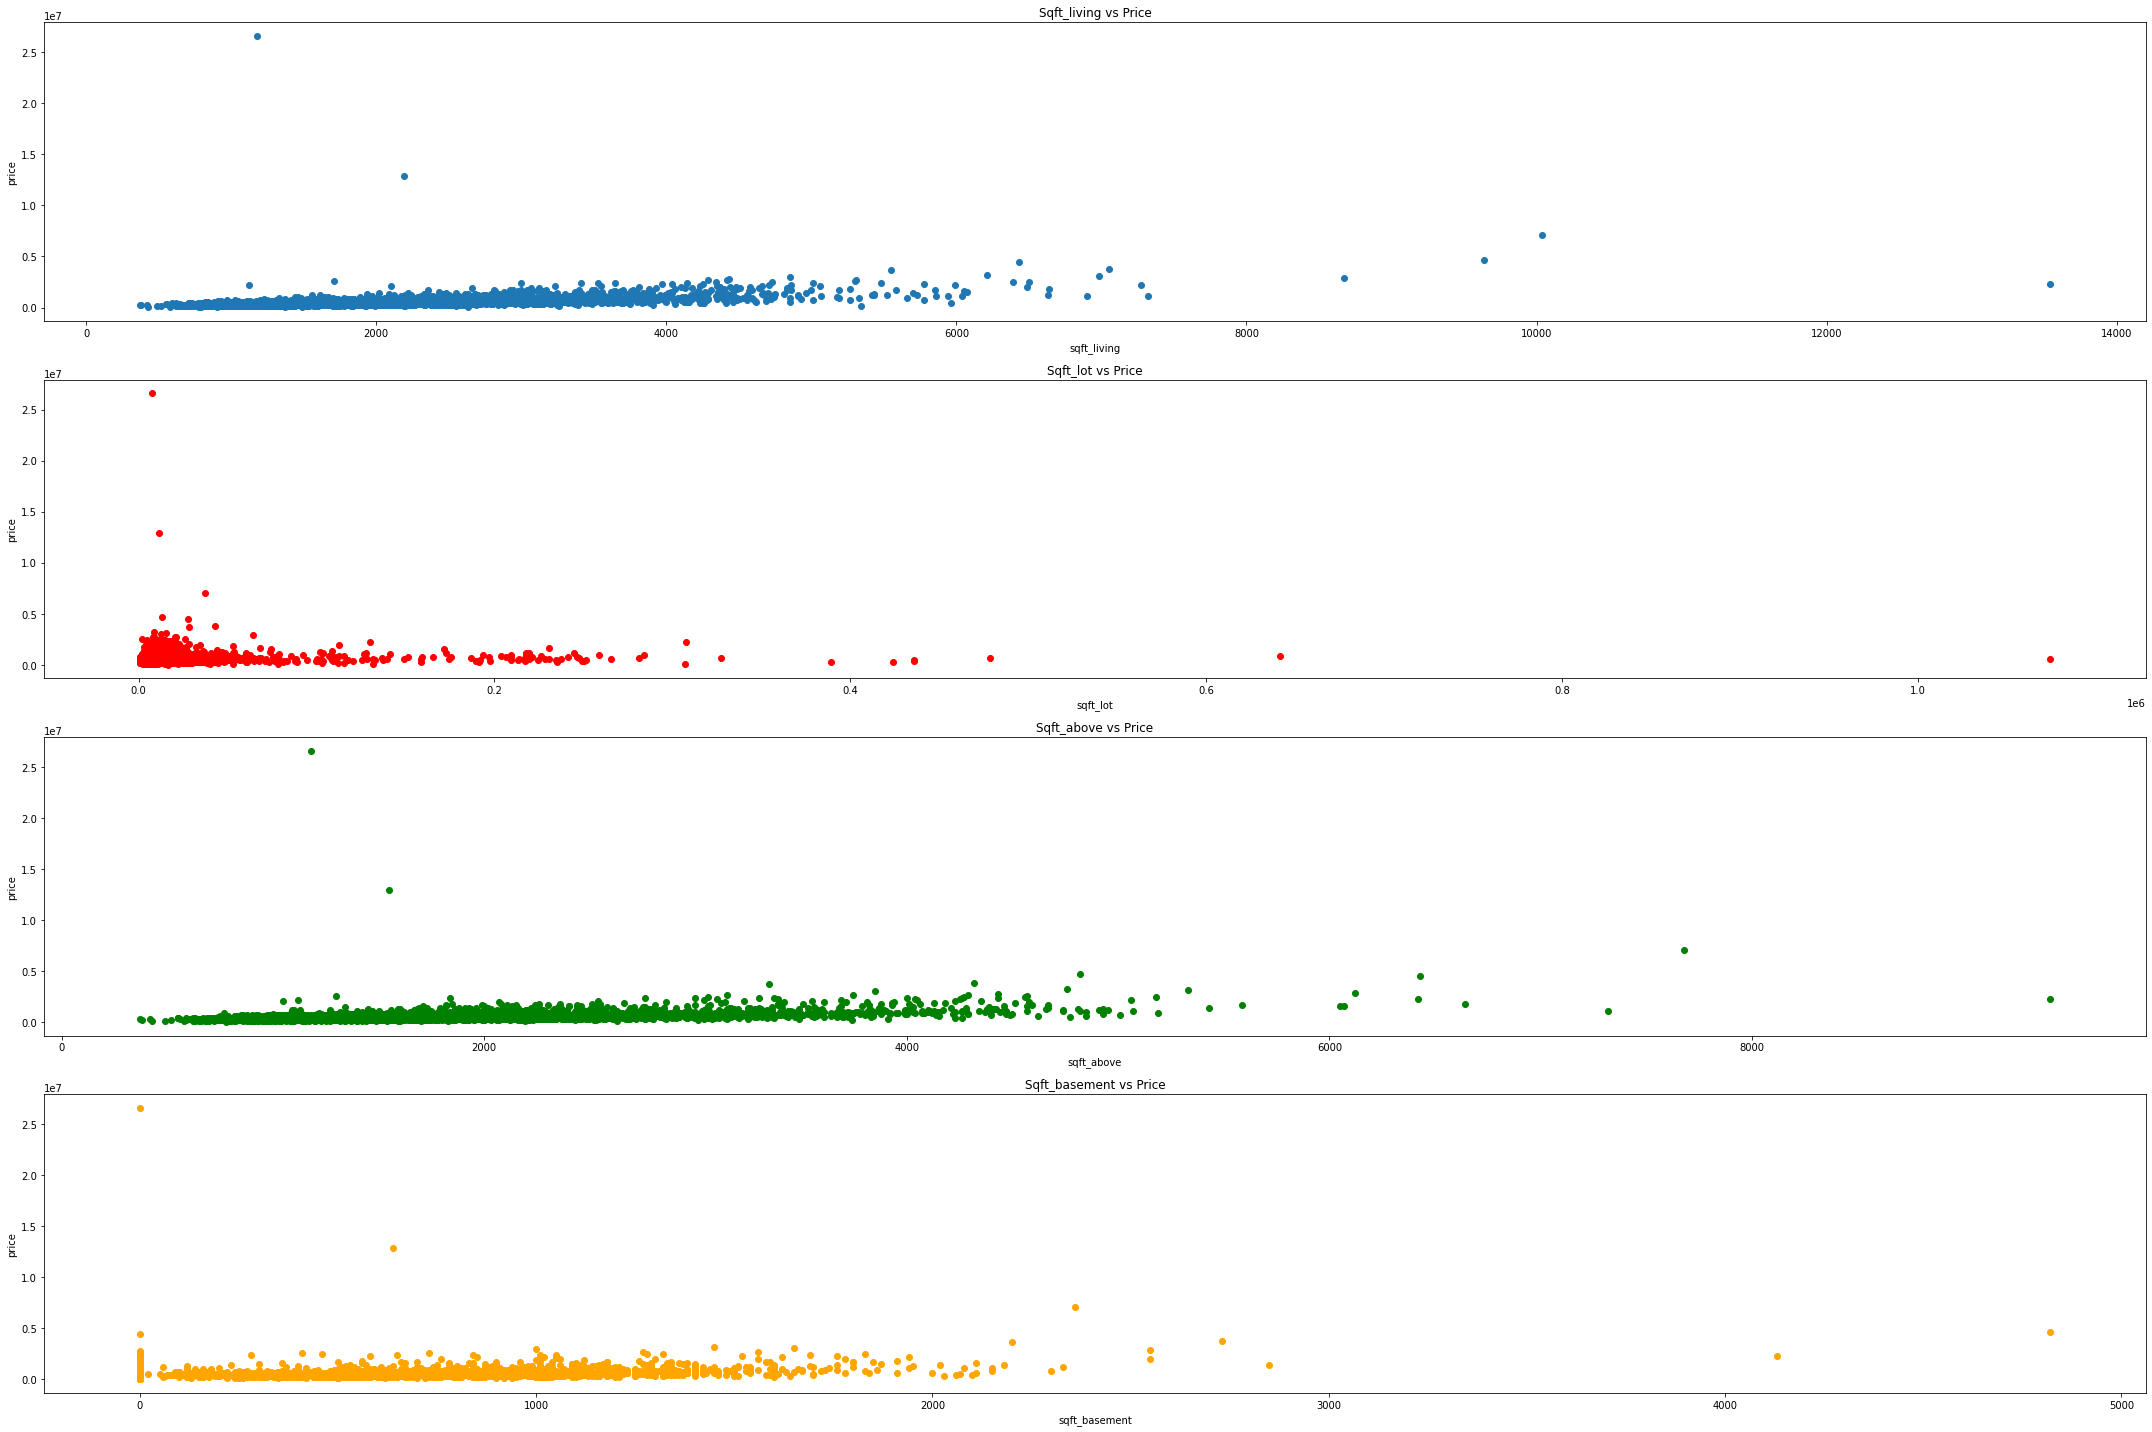

In [31]:
plotGraphs(housing_1)

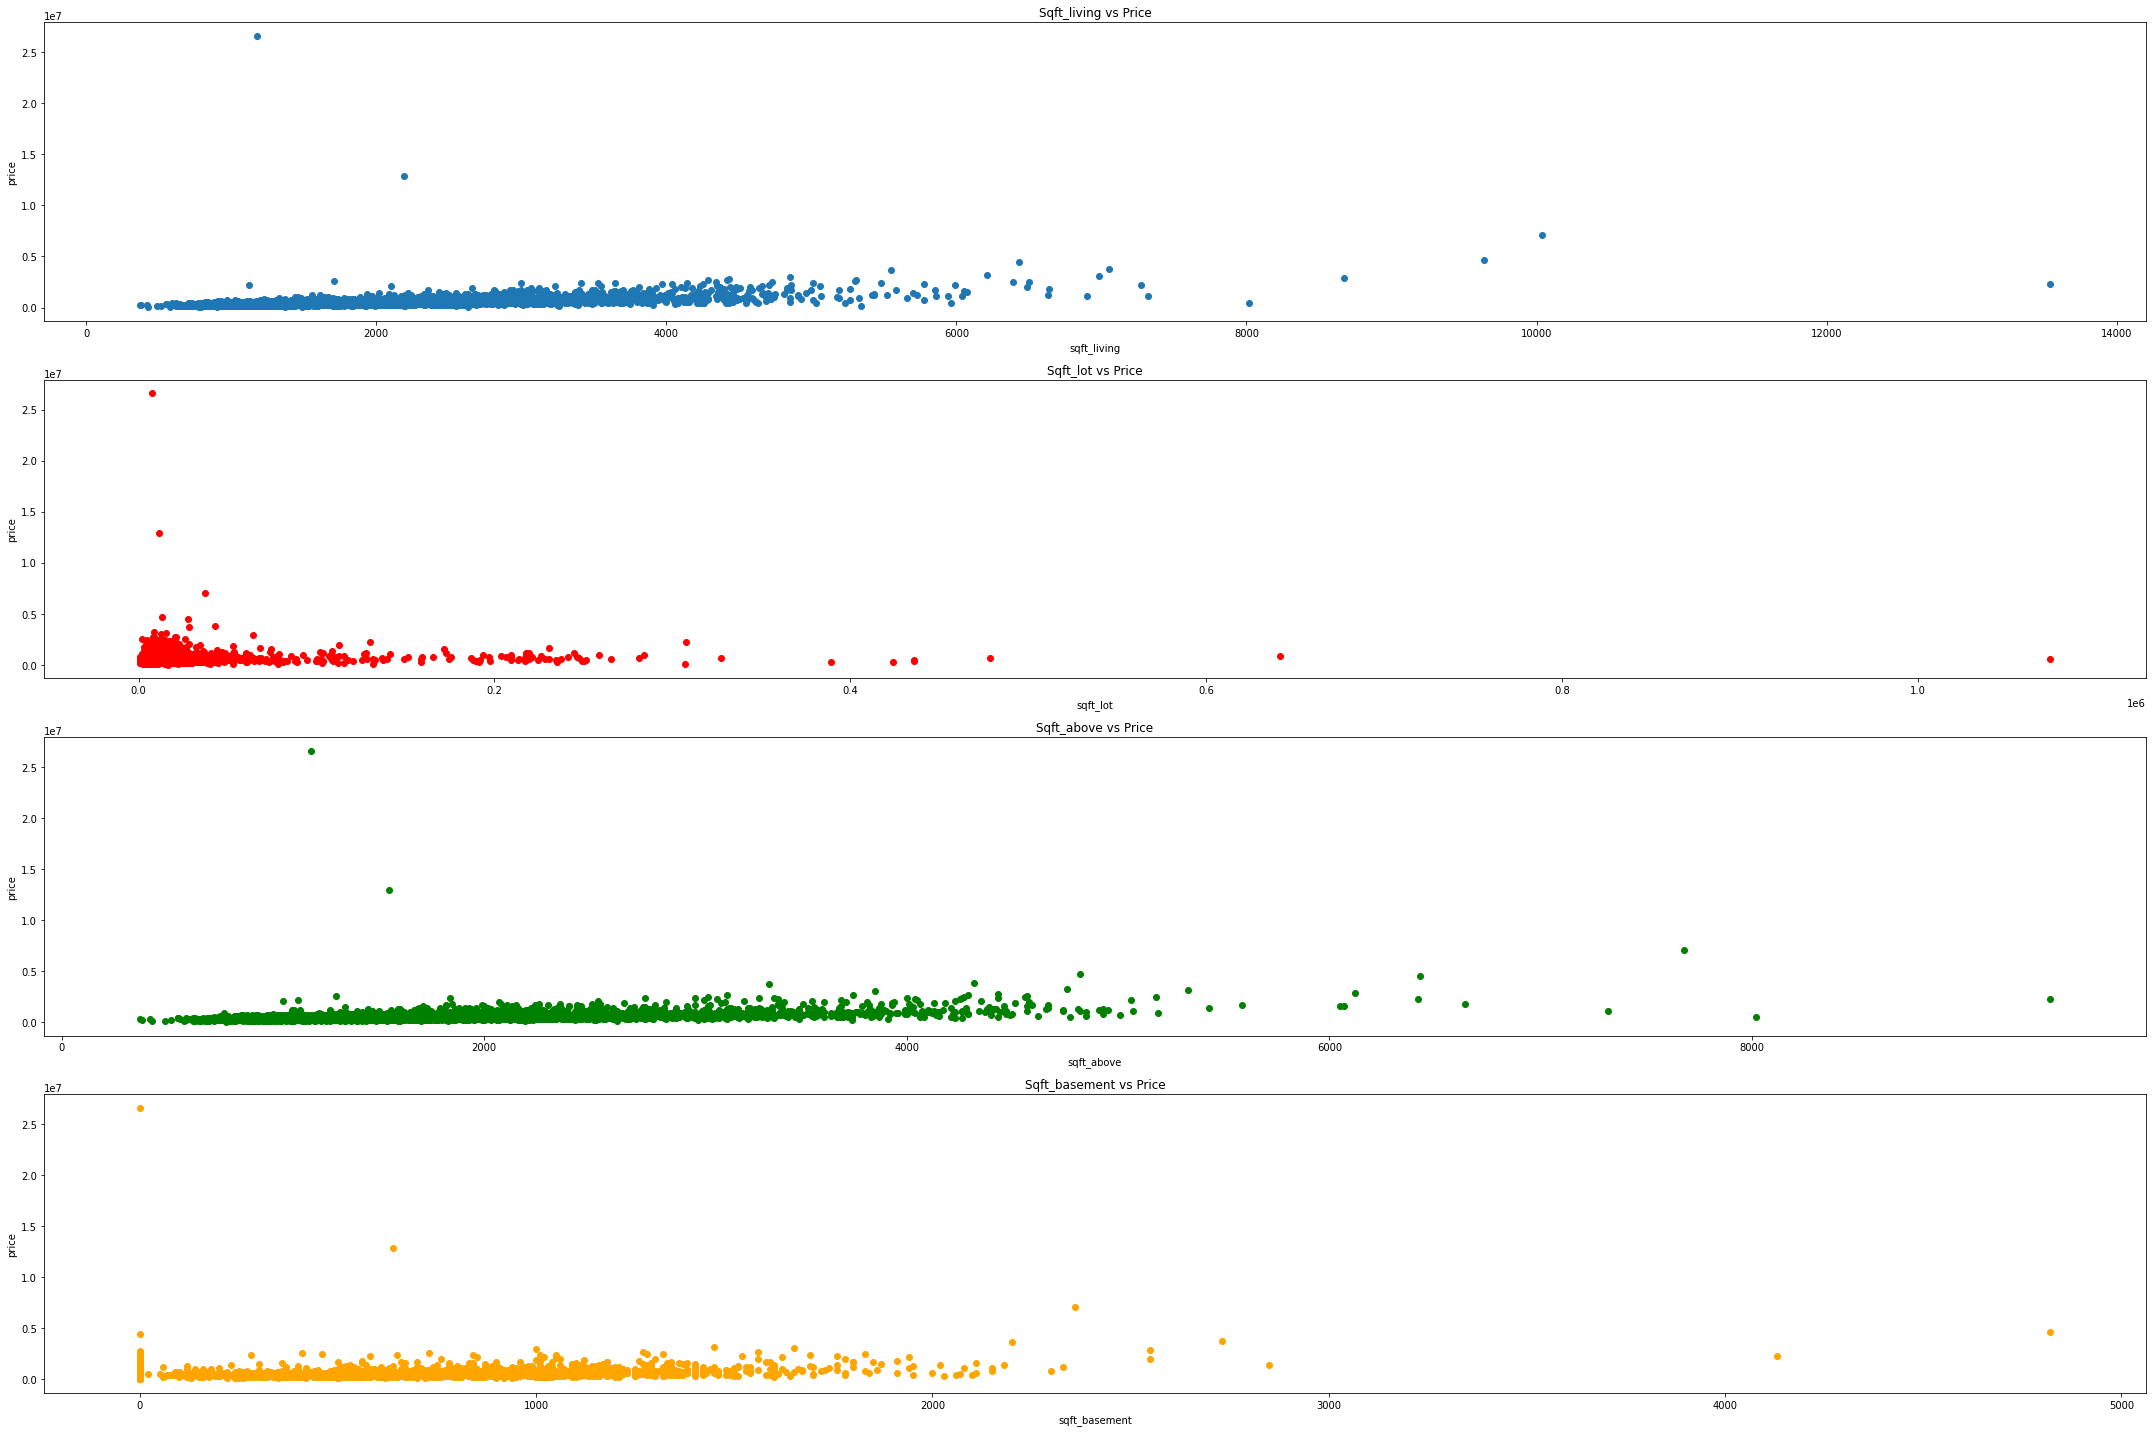

In [32]:
plotGraphs(housing_2)

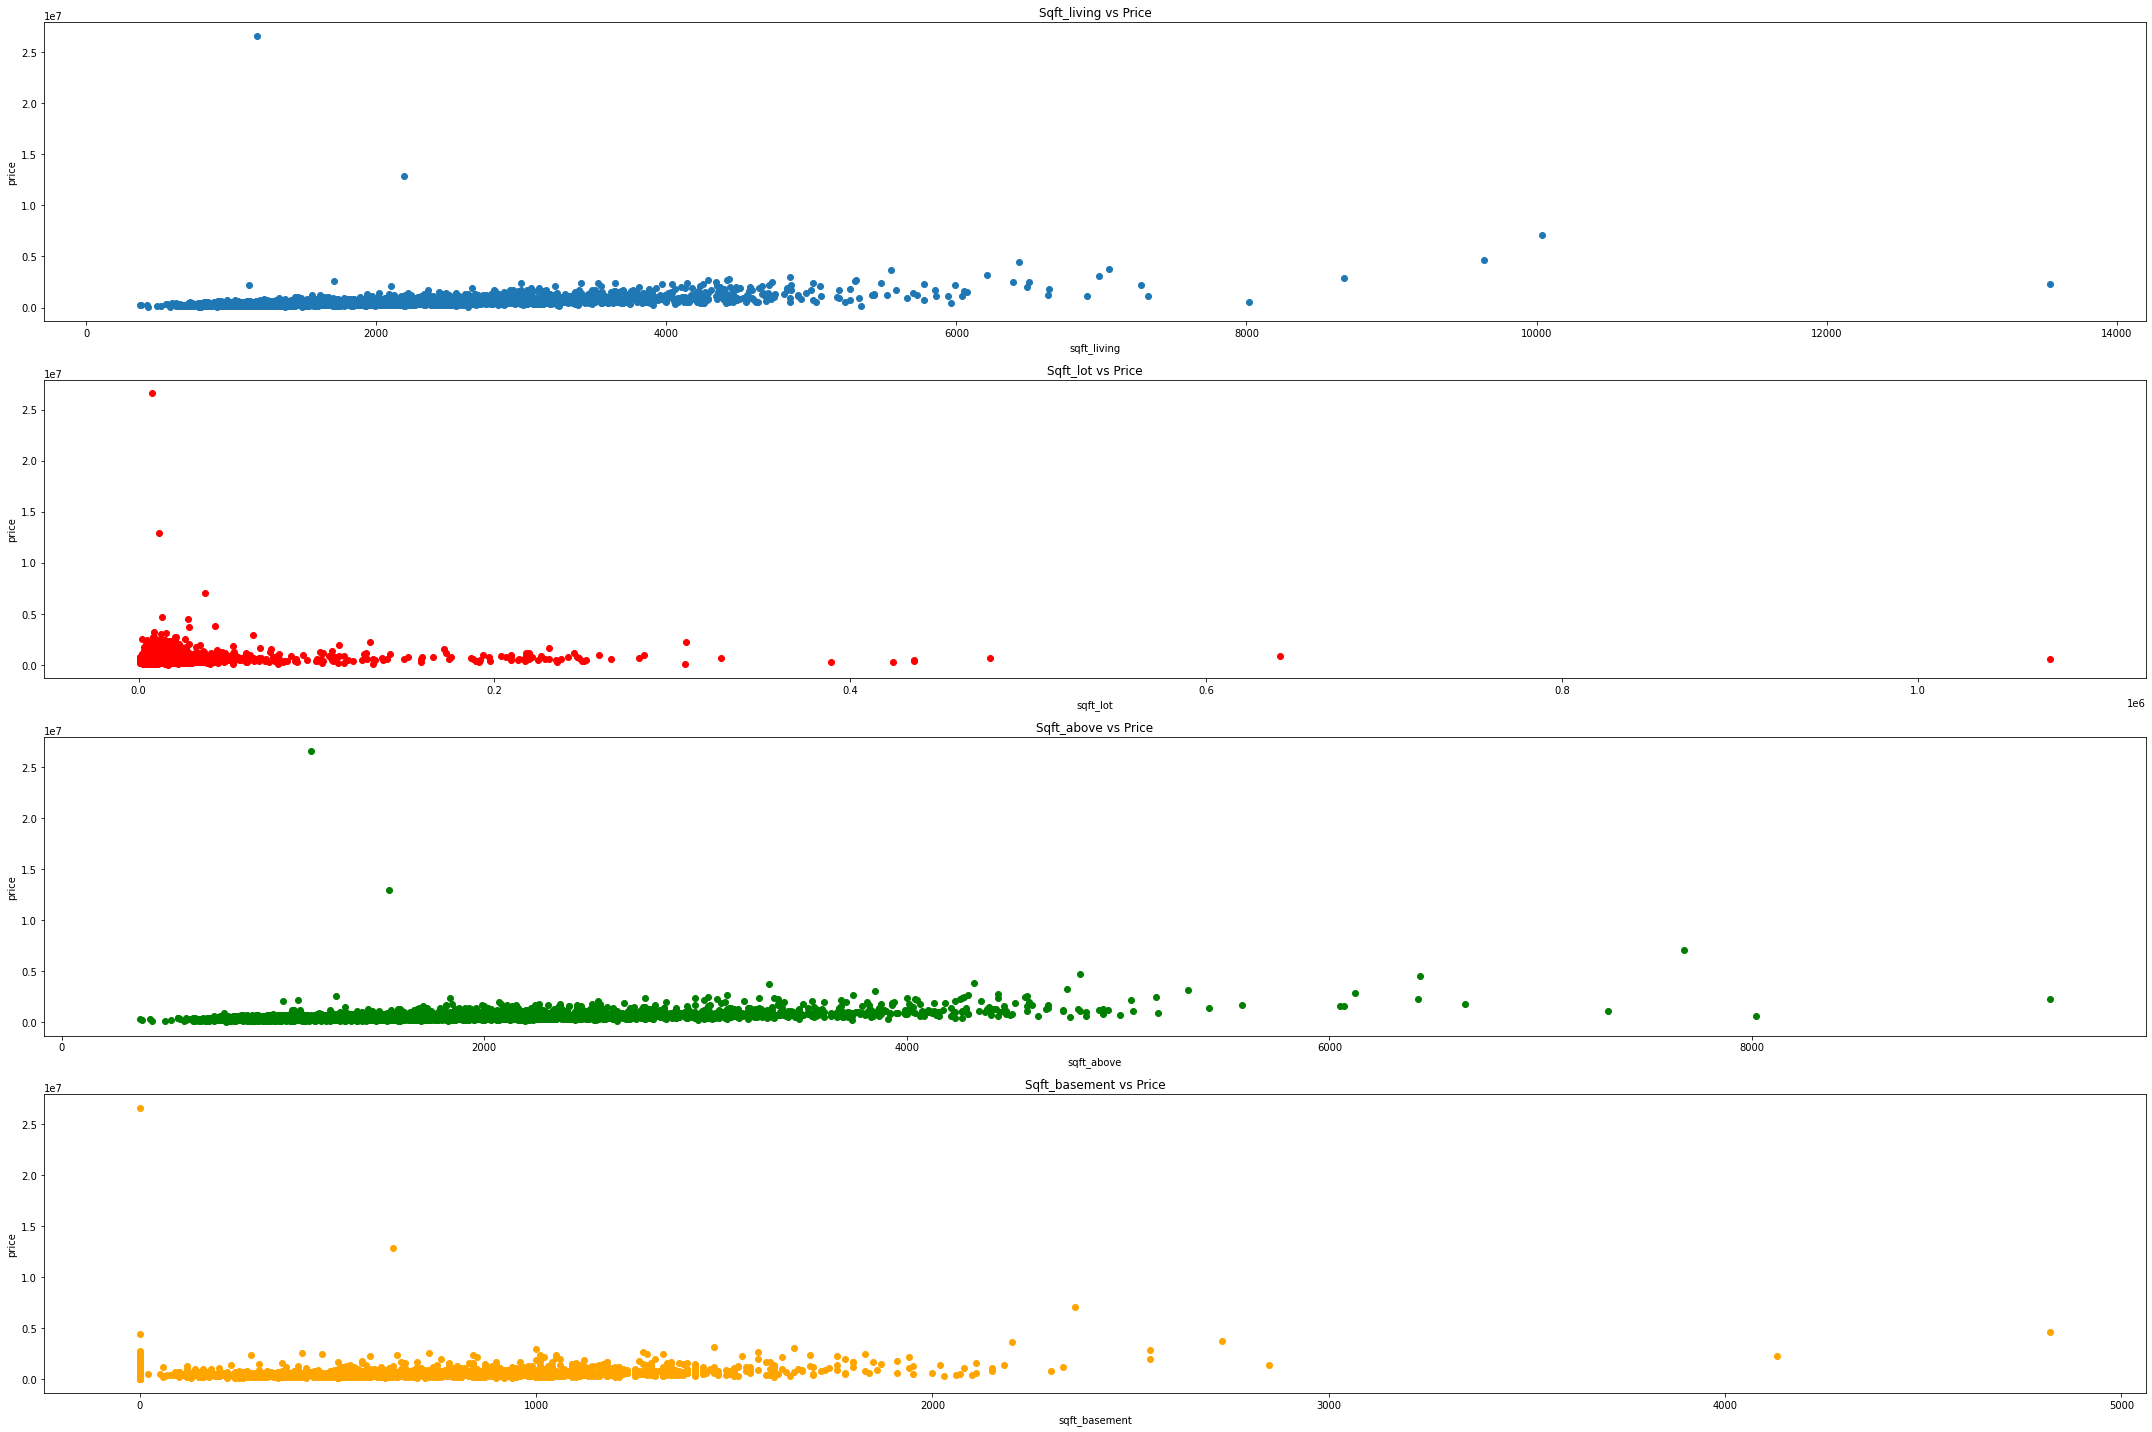

In [33]:
plotGraphs(housing_3)

### Q: Write your own function that computes the correlation coefficient between the target and the continuous valued features.  Do the resulting correlation coefficients agree with your visual inspection of linear correlation?  Why or why not?  How do the correlation coefficients differ for each set ?

In [ ]:
City and Statezip are the attributes whihc are not easily recognizable and categorized by the machine so it is better to one hot encode with these attributes.

The other attributes can be easily grouped,judged by the machine as they have numerical data which is continuous

In [34]:
def pcorr(x, y):
    n = len(x)
    xm = x.mean()
    ym = y.mean()
    dx, dy, nxy = 0,0,0
    for i in range(0,n):
        nxy += (x[i] - xm)*(y[i] - ym)
        dx += (x[i] - xm)**2
        dy += (y[i] - ym)**2
    dx = dx**0.5
    dy = dy**0.5
    cor = nxy/(dx*dy)
    return cor

In [35]:
print('price \t {}'.format((pcorr(housing['price'],housing['price']))))
print('sqft_living \t {}'.format((pcorr(housing['price'],housing['sqft_living']))))
print('sqft_above \t {}'.format((pcorr(housing['price'],housing['sqft_above']))))
print('bathrooms \t {}'.format((pcorr(housing['price'],housing['bathrooms']))))
print('view \t {}'.format((pcorr(housing['price'],housing['view']))))
print('sqft_basement \t {}'.format((pcorr(housing['price'],housing['sqft_basement']))))
print('bedrooms \t {}'.format((pcorr(housing['price'],housing['bedrooms']))))
print('floors \t {}'.format((pcorr(housing['price'],housing['floors']))))
print('waterfront \t {}'.format((pcorr(housing['price'],housing['waterfront']))))
print('sqft_lot \t {}'.format((pcorr(housing['price'],housing['sqft_lot']))))
print('condition \t {}'.format((pcorr(housing['price'],housing['condition']))))
print('yr_built \t {}'.format((pcorr(housing['price'],housing['yr_built']))))

price 	 1.0
sqft_living 	 0.4304100254326293
sqft_above 	 0.36756960160042657
bathrooms 	 0.32710991828773556
view 	 0.22850417280566584
sqft_basement 	 0.2104265717748264
bedrooms 	 0.2003362893756753
floors 	 0.1514608005367798
waterfront 	 0.13564832245848418
sqft_lot 	 0.050451295032348964
condition 	 0.034914537326412934
yr_built 	 0.021856830395478952


In [36]:
corr_matrix = housing.corr()
corr_matrix['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64

#### We can see same values for in-built function and the one we have written.

### Use OneHotEncoder to encode each variable that you deem should be converted, for each dataset.  For each variable that you encode, provide a rationale or justification for why it needs to be encoded.Also, provide a rationale for the variables that you choose not to encode.

In [37]:
one_hot = pd.get_dummies(housing_1[['city','statezip']])
housing_1 = housing.drop(housing_1[['city', 'statezip']],axis = 1)
housing_1 = housing_1.join(one_hot)

In [38]:
housing_1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
one_hot = pd.get_dummies(housing_2[['city','statezip']])
housing_2 = housing.drop(housing_2[['city', 'statezip']],axis = 1)
housing_2 = housing_2.join(one_hot)

In [40]:
one_hot = pd.get_dummies(housing_3[['city','statezip']])
housing_3 = housing.drop(housing_3[['city', 'statezip']],axis = 1)
housing_3 = housing_3.join(one_hot)

In [41]:
one_hot = pd.get_dummies(housing[['city','statezip']])
housing = housing.drop(housing[['city', 'statezip']],axis = 1)
housing = housing.join(one_hot)

### Q: For the continuous variables and the ones where one-hot encoding is not applied, separatelyperform normalization (min-max scaling) and standardization for each of these variables, for each dataset.  Hence, you should have eight different versions of the dataset after this step.Show and verify that the data has been converted correctly in each case.

Performed the normalization(min-max scaling) for the attributes other than one hot encoded)

In [42]:
from sklearn import preprocessing

numerical_attributes = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

scaler = preprocessing.MinMaxScaler()
names = housing[numerical_attributes].columns
d = scaler.fit_transform(housing[numerical_attributes])
df_scaler0 = pd.DataFrame(d, columns=names)
df_scaler0 = df_scaler0.join(one_hot)
df_scaler0 = df_scaler0.join(housing['price'])
df_scaler0.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,city_Algona,city_Auburn,...,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354,price
0,0.333333,0.18750,0.073652,0.006775,0.107301,0.000000,0.482456,0.995531,0,0,...,0,0,0,0,0,0,0,0,0,313000.0
1,0.555556,0.31250,0.249051,0.007835,0.331858,0.058091,0.184211,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,2384000.0
2,0.333333,0.25000,0.118451,0.010534,0.172566,0.000000,0.578947,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,342000.0
3,0.333333,0.28125,0.123766,0.006885,0.069690,0.207469,0.552632,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,420000.0
4,0.444444,0.31250,0.119210,0.009186,0.085177,0.165975,0.666667,0.989076,0,0,...,0,0,0,0,0,0,0,0,0,550000.0


In [43]:
scaler = preprocessing.MinMaxScaler()
names = housing_1[numerical_attributes].columns
d = scaler.fit_transform(housing_1[numerical_attributes])
df_scaler1 = pd.DataFrame(d, columns=names)
df_scaler1 = df_scaler1.join(one_hot)
df_scaler1 = df_scaler1.join(housing_1['price'])

In [44]:
scaler = preprocessing.MinMaxScaler()
names = housing_2[numerical_attributes].columns
d = scaler.fit_transform(housing_2[numerical_attributes])
df_scaler2 = pd.DataFrame(d, columns=names)
df_scaler2 = df_scaler2.join(one_hot)
df_scaler2 = df_scaler2.join(housing_2['price'])

In [45]:
scaler = preprocessing.MinMaxScaler()
names = housing_3[numerical_attributes].columns
d = scaler.fit_transform(housing_3[numerical_attributes])
df_scaler3 = pd.DataFrame(d, columns=names)
df_scaler3 = df_scaler3.join(one_hot)
df_scaler3 = df_scaler3.join(housing_3['price'])

In [46]:
from sklearn import preprocessing
norm = preprocessing.StandardScaler()
names = housing[numerical_attributes].columns
df_norm = norm.fit_transform(housing[numerical_attributes])
df_stnd0 = pd.DataFrame(df_norm, columns=names)
df_stnd0 = df_stnd0.join(one_hot)
df_stnd0 = df_stnd0.join(housing['price'])
df_stnd0.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,city_Algona,city_Auburn,...,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354,price
0,-0.441122,-0.843204,-0.829971,-0.193434,-0.565224,-0.672464,-0.531014,1.221670,0,0,...,0,0,0,0,0,0,0,0,0,313000.0
1,1.759705,0.432802,1.568528,-0.161718,1.789559,-0.069128,-1.674693,-0.825693,0,0,...,0,0,0,0,0,0,0,0,0,2384000.0
2,-0.441122,-0.205201,-0.217367,-0.080978,0.119171,-0.672464,-0.161000,-0.825693,0,0,...,0,0,0,0,0,0,0,0,0,342000.0
3,-0.441122,0.113800,-0.144686,-0.190145,-0.959621,1.482306,-0.261913,-0.825693,0,0,...,0,0,0,0,0,0,0,0,0,420000.0
4,0.659291,0.432802,-0.206984,-0.121306,-0.797222,1.051352,0.175376,1.208396,0,0,...,0,0,0,0,0,0,0,0,0,550000.0


In [47]:
norm = preprocessing.StandardScaler()
names = housing_1[numerical_attributes].columns
df_norm = norm.fit_transform(housing_1[numerical_attributes])
df_stnd1 = pd.DataFrame(df_norm, columns=names)
df_stnd1 = df_stnd1.join(one_hot)
df_stnd1 = df_stnd1.join(housing_1['price'])

In [48]:
norm = preprocessing.StandardScaler()
names = housing_2[numerical_attributes].columns
df_norm = norm.fit_transform(housing_2[numerical_attributes])
df_stnd2 = pd.DataFrame(df_norm, columns=names)
df_stnd2 = df_stnd2.join(one_hot)
df_stnd2 = df_stnd2.join(housing_2['price'])

In [49]:
norm = preprocessing.StandardScaler()
names = housing_3[numerical_attributes].columns
df_norm = norm.fit_transform(housing_3[numerical_attributes])
df_stnd3 = pd.DataFrame(df_norm, columns=names)
df_stnd3 = df_stnd3.join(one_hot)
df_stnd3 = df_stnd3.join(housing_1['price'])

For each data set (eight in total), us Scikit-learns KFold object to generate 10 folds of trainingand testing sets for cross validation.  Be sure to set the random state variable.  For each fold,train a Linear Regression model (see chapter 2 of ”Hands-on Machine Learning...”) using thetraining data.  Then make predictions of the housing prices of the test data, using the trainedmodel.

Using scikit cross val functions we prdicted the housing prices below

The K-fold function splits the data into 10- folds and uses some sets for prrdiciton and some for testing.

The mean absolute erros and mean squares error are calculated below which helps us in understanding how accurate our predicitons are.

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import KFold 

all_data = [df_stnd0, df_stnd1, df_stnd2, df_stnd3, df_scaler0, df_scaler1, df_scaler2, df_scaler3]

def display_error():
    for i in all_data:
        lin_reg = LinearRegression()

        y_i = i['price']

        X_i = i.drop('price', axis =1)

        kf = KFold(n_splits=10) 

        kf.get_n_splits(X_i) 

        KFold(n_splits=2, shuffle=False)

        scores_mse = cross_val_score(lin_reg, X_i, y_i, scoring = "neg_mean_squared_error", cv=10)
        scores_mae = cross_val_score(lin_reg, X_i, y_i, scoring = "neg_mean_absolute_error", cv=10)
        print(f'Score_mse: {np.sqrt(-scores_mse)}')
        print(f'Score_mae: {np.sqrt(-scores_mae)}')

In [54]:
display_error()

Score_mse: [8.77724050e+14 1.47499922e+05 2.70376677e+14 1.71302689e+17
 2.65573869e+05 2.03041480e+05 2.12807429e+05 1.60169934e+05
 2.14110309e+05 1.41632793e+06]
Score_mae: [7.58867477e+06 3.13362746e+02 3.55054611e+06 8.93701798e+07
 3.33385431e+02 3.35251110e+02 3.29314116e+02 3.25672029e+02
 3.53478977e+02 5.53520359e+02]
Score_mse: [8.77724050e+14 1.47499922e+05 2.70376677e+14 1.71302689e+17
 2.65573869e+05 2.03041480e+05 2.12807429e+05 1.60169934e+05
 2.14110309e+05 1.41632793e+06]
Score_mae: [7.58867477e+06 3.13362746e+02 3.55054611e+06 8.93701798e+07
 3.33385431e+02 3.35251110e+02 3.29314116e+02 3.25672029e+02
 3.53478977e+02 5.53520359e+02]
Score_mse: [8.77724050e+14 1.47499922e+05 2.70376677e+14 1.71302689e+17
 2.65573869e+05 2.03041480e+05 2.12807429e+05 1.60169934e+05
 2.14110309e+05 1.41632793e+06]
Score_mae: [7.58867477e+06 3.13362746e+02 3.55054611e+06 8.93701798e+07
 3.33385431e+02 3.35251110e+02 3.29314116e+02 3.25672029e+02
 3.53478977e+02 5.53520359e+02]
Score_mse:


* Price is highly skewed 
* Big Values Outliers are the reason for big errors
* Zero valued data is also one of the reason 
